<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw2/Dellorco_MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

Filled in by Sarah Dellorco

In [ ]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi2 distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Frequency of Occurence')

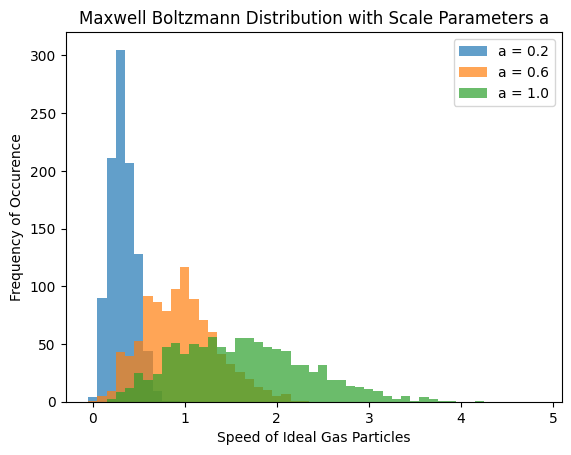

In [ ]:
np.random.seed(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);

# your code to add labels here
pl.legend()
pl.title("Maxwell Boltzmann Distribution with Scale Parameters a")
pl.xlabel("Speed of Ideal Gas Particles")
pl.ylabel("Frequency of Occurence")

a determines the scale of the distribution. In other words, three different chi-square distributions are shown, each with a different spread, and a scale parameter of 0.2 generates a range of values reflective of the 0.2. df is the degrees of freedom which is set to 3 here. The size is 1000 meaning there's 1000 samples for EACH distribution. The label line sets the legend to display just one decimal place. Out of the 1000 random samples taken from this a=0.2 distribution, approximately 230 of them have values falling within the 0.1 bin on the x-axis of the histogram.

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


Your answer here: The dependency is on the root of the temperature since the dependency is to a power 1/2. T raised to the 1/2 power is the same as the square root of T. If the dependency was to a power of -1/2, then the dependency would be on the inverse root of the temperature.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi2 distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

In [ ]:
# your code here
# Theoretical Means based on the Wikipedia formula
np.random.seed(123)
df = 3
mean_a1 = np.sqrt(2) * (sp.special.gamma((df + 1) / 2) / sp.special.gamma(df / 2)) * 0.2
mean_a2 = np.sqrt(2) * (sp.special.gamma((df + 1) / 2) / sp.special.gamma(df / 2)) * 0.6
mean_a3 = np.sqrt(2) * (sp.special.gamma((df + 1) / 2) / sp.special.gamma(df / 2)) * 1.0
# Mean of the Empirical Distributions

# Sample means from the empirical distributions
em_mean_a1 = np.mean(sp.stats.chi.rvs(df=3, scale=0.2, size=1000))
em_mean_a2 = np.mean(sp.stats.chi.rvs(df=3, scale=0.6, size=1000))
em_mean_a3 = np.mean(sp.stats.chi.rvs(df=3, scale=1.0, size=1000))
print("Theoretical Mean of a=0.2: ", mean_a1)
print("Empirical Mean of a=0.2: ",em_mean_a1)
print("Theoretical Mean of a=0.6: ", mean_a2)
print("Empirical Mean of a=0.6: ",em_mean_a2)
print("Theoretical Mean of a=1: ", mean_a3)
print("Empirical Mean of a=1: ",em_mean_a3)

Theoretical Mean of a=0.2:  0.3191538243211462
Empirical Mean of a=0.2:  0.3232486878580981
Theoretical Mean of a=0.6:  0.9574614729634384
Empirical Mean of a=0.6:  0.9557911349409777
Theoretical Mean of a=1:  1.5957691216057308
Empirical Mean of a=1:  1.6377426307781853


The theoretical and empirical means calculated are all very close to each other. According to the graph, for a=0.2, the most probable range is from 0.25 to 0.35, and both the theoretical and empirical means fall within that range.For a=0.6, the most probable range is from 0.95 to 1.05. Again, both the theoretical and empirical means fall in this range. For a=1.0, the most probable range is a bit larger since multiple bins have the same y-value, but the theoretical and empirical means do appear to fall somewhere in that range.

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
## your code here
